In [45]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh

In [46]:
# constants
hbar = 1
omega = 1
mass = 1
lamb = 1

# discretization
N = 200
x_max = 10
x_list = np.linspace(-x_max, x_max, N)
dx = x_list[1] - x_list[0]

# constants factored out
kineticConstant = -hbar**2 / (2 * mass * dx**2)
potentialConstant = 0.5 * mass * omega**2
perturbationConstant = lamb / 24

# finite difference coefficient into kinetic matrix
main_diag = np.full(N, -2)
off_diag = np.full(N - 1, 1)
kineticMatrix = diags([off_diag, main_diag, off_diag], offsets=[-1, 0, 1])

# potential matrix
potentialMatrix = diags([x_list**2], [0])

# perturbation matrix
perturbation = diags([x_list**4], [0])

# hamiltonian -> H = H0 + Perturbation
H = kineticConstant * kineticMatrix + potentialConstant * potentialMatrix + perturbationConstant * perturbation

# eigenvalues and vectors
numStates = 6
eigenvalues, eigenstates = eigsh(H, k=numStates, which='SM')

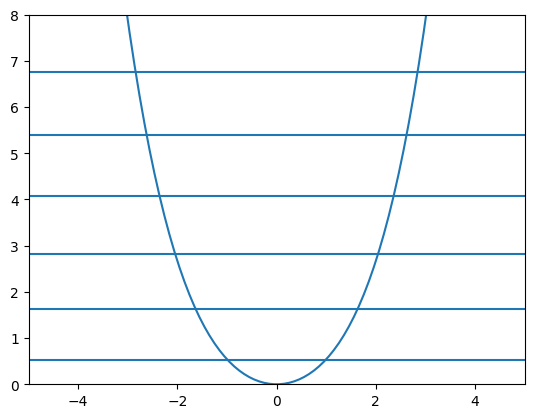

In [47]:
# plot potential
potential_values = []
for x in x_list:
    potential_values.append(0.5 * mass * omega**2 * x**2 + lamb / 24 * x**4)
plt.ylim(0, 8)
plt.xlim(-5, 5)
plt.plot(x_list, potential_values)

# plot eigenvalues
plt.hlines(y=eigenvalues, xmin=-x_max, xmax=x_max)
plt.show()

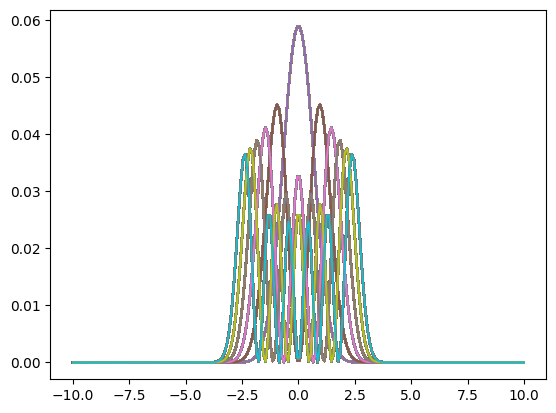

In [48]:
# plot wavefunction
for i in range(len(eigenstates)):
    plt.plot(x_list, np.abs(eigenstates)**2)
plt.show()